Задание 1

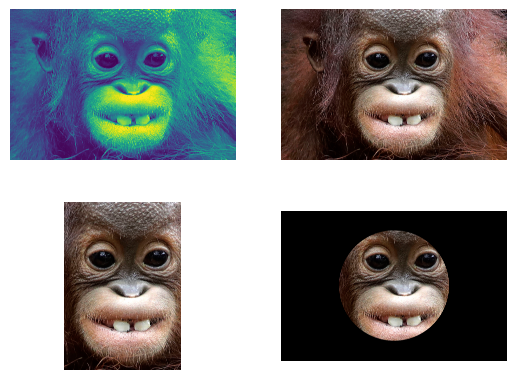

In [13]:
from scipy import misc
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnchoredOffsetbox
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

face = mpimg.imread('img.jpg')
fig, axes = plt.subplots(nrows=2, ncols=2)

axes.flat[0].imshow(face[:, :, 0])
axes.flat[0].axis('off')

axes.flat[1].imshow(face)
axes.flat[1].axis('off')

axes.flat[2].imshow(face[0:4000, 1500:4000])
axes.flat[2].axis('off')

img = np.array(Image.open('img.jpg'))
sy, sx, sz = img.shape
y, x = np.ogrid[0:sy, 0:sx]

center = (sx//2, sy//2)
mask = ((y - center[1])**2 + (x - center[0])**2) > 1315**2
img[mask] = 0
axes.flat[3].imshow(img)
axes.flat[3].axis('off')

plt.show()

Задание 2 - работа со статистикой

In [14]:
import requests
target_url = 'https://scipy-lectures.org/_downloads/populations.txt'
response = requests.get(target_url)
text_data = response.text

filename = 'populations.txt'

with open(filename, 'w') as file:
    file.write(text_data)

<function matplotlib.pyplot.show(close=None, block=None)>

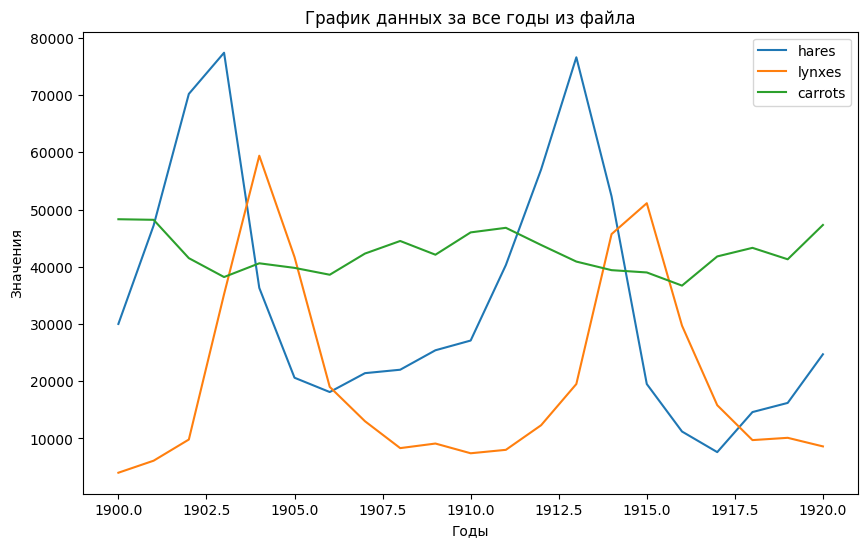

In [18]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(filename, skiprows=1)
year, hares, lynxes, carrots = data.T

plt.figure(figsize=(10, 6))
plt.plot(year, hares, label='hares')
plt.plot(year, lynxes, label='lynxes')
plt.plot(year, carrots, label='carrots')
plt.title('График данных за все годы из файла')
plt.xlabel('Годы')
plt.ylabel('Значения')
plt.legend()
plt.show

In [19]:
# 2.1 mean and std for each kind of animals
mean_hares, std_hares = np.mean(hares), np.std(hares)
mean_carrots, std_carrots = np.mean(carrots), np.std(carrots)
mean_lynxes, std_lynxes = np.mean(lynxes), np.std(lynxes)


print(f"Среднее и стандартное отклонение для Hares: {mean_hares}, {std_hares}")
print(f"Среднее и стандартное отклонение для Carrots: {mean_carrots}, {std_carrots}")
print(f"Среднее и стандартное отклонение для Lynxes: {mean_lynxes}, {std_lynxes}")

Среднее и стандартное отклонение для Hares: 34080.95238095238, 20897.906458089667
Среднее и стандартное отклонение для Carrots: 42400.0, 3322.5062255844787
Среднее и стандартное отклонение для Lynxes: 20166.666666666668, 16254.591536908763


In [20]:
# 2.2 max population for each animal (year)
year_of_max_population_for_hares = year[np.argmax(hares)]
year_of_max_population_for_carrots = year[np.argmax(carrots)]
year_of_max_population_for_lynxes = year[np.argmax(lynxes)]

print(f"Год с наибольшей популяцией для Hares: {year_of_max_population_for_hares}")
print(f"Год с наибольшей популяцией для Carrots: {year_of_max_population_for_carrots}")
print(f"Год с наибольшей популяцией для Lynxes: {year_of_max_population_for_lynxes}")

Год с наибольшей популяцией для Hares: 1903.0
Год с наибольшей популяцией для Carrots: 1900.0
Год с наибольшей популяцией для Lynxes: 1904.0


In [23]:
# 2.3 for each year find animal class with max population
years_with_animal_classes = np.array(['hares', 'lynxes', 'carrots'])[np.argmax(data[:, 1:], axis=1)]
print(f"Вид с наибольшей популяцией за каждый год: {years_with_animal_classes}")

Вид с наибольшей популяцией за каждый год: ['carrots' 'carrots' 'hares' 'hares' 'lynxes' 'lynxes' 'carrots' 'carrots'
 'carrots' 'carrots' 'carrots' 'carrots' 'hares' 'hares' 'hares' 'lynxes'
 'carrots' 'carrots' 'carrots' 'carrots' 'carrots']


In [26]:
# 2.4 years, population > 50000
value = 50000
years_population_above_value = year[np.all(data[:, 1:] > value, axis=1)]
print(years_population_above_value)

[]


In [28]:
# 2.5 Топ 2 года для каждого вида, когда его популяции были самыми низкими.
top_hares = year[np.argsort(hares)[:2]]
top_carrots = year[np.argsort(carrots)[:2]]
top_lynxes = year[np.argsort(lynxes)[:2]]

print(f"hares - {top_hares}, carrots - {top_carrots}, lynxes - {top_lynxes}")

hares - [1917. 1916.], carrots - [1916. 1903.], lynxes - [1900. 1901.]


Коэфф. кореляции - -0.05136252586288724


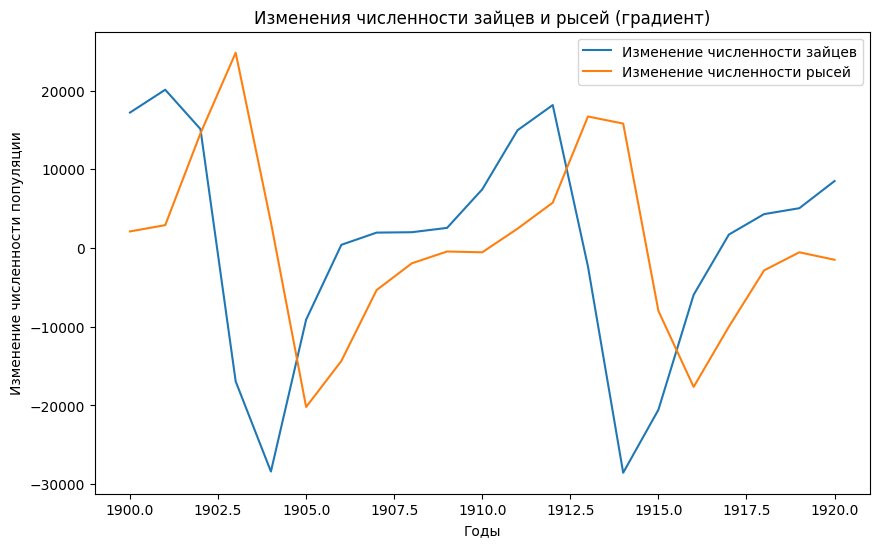

In [31]:
# 2.6 Сравните (постройте график) изменения численности зайцев (см. help(np.gradient)) и численности рысей. Проверьте корреляцию (см. help(np.corrcoef)).
hares_gradient = np.gradient(hares, year)
lynxes_gradient = np.gradient(lynxes, year)
correlation_gradient = np.corrcoef(hares_gradient, lynxes_gradient)[0, 1]
print(f"Коэфф. кореляции - {correlation_gradient}")

plt.figure(figsize=(10, 6))
plt.plot(year, hares_gradient, label='Изменение численности зайцев')
plt.plot(year, lynxes_gradient, label='Изменение численности рысей')
plt.title('Изменения численности зайцев и рысей (градиент)')
plt.xlabel('Годы')
plt.ylabel('Изменение численности популяции')
plt.legend()
plt.show()

Задание 3 Напишите скрипт, который нарисует множество Мандельброта на ваш вкус (в плане количества итераций)

In [34]:
def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z**2 + c
        n += 1
    if n == max_iter:
        return max_iter
    return n + 1 - np.log(np.log2(abs(z)))

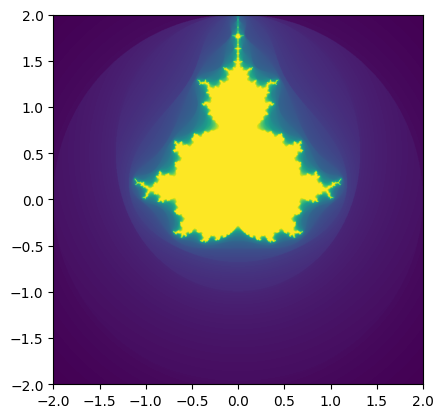

In [40]:
import numpy as np
import matplotlib.pyplot as plt

width, height = 800, 800
x_min, x_max = -2, 2
y_min, y_max = -2, 2
max_iter = 15

image = np.zeros((width, height))

for x in range(width):
    for y in range(height):
        real = x_min + x * (x_max - x_min) / (width - 1)
        imaginary = y_min + y * (y_max - y_min) / (height - 1)
        c = complex(real, imaginary)
        color = mandelbrot(c, max_iter)
        image[x, y] = color

plt.imshow(image, extent=(x_min, x_max, y_min, y_max))
plt.savefig('mandelbrot.png')
plt.show()